# Importing relevant geospatial/python library packages

In [4]:
import geopandas as gdp
import pandas as pd
import numpy as np
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import os
from glob import glob
import matplotlib.pyplot as plt


In [2]:
# paths    
    
landsat_path = glob("Landsat_files/LC08_L1TP_091086_20191222_20200110_01_T1_sr_band*.tif")
landsat_path.sort()
array_stack, meta_data = es.stack(landsat_path, nodata=-9999)

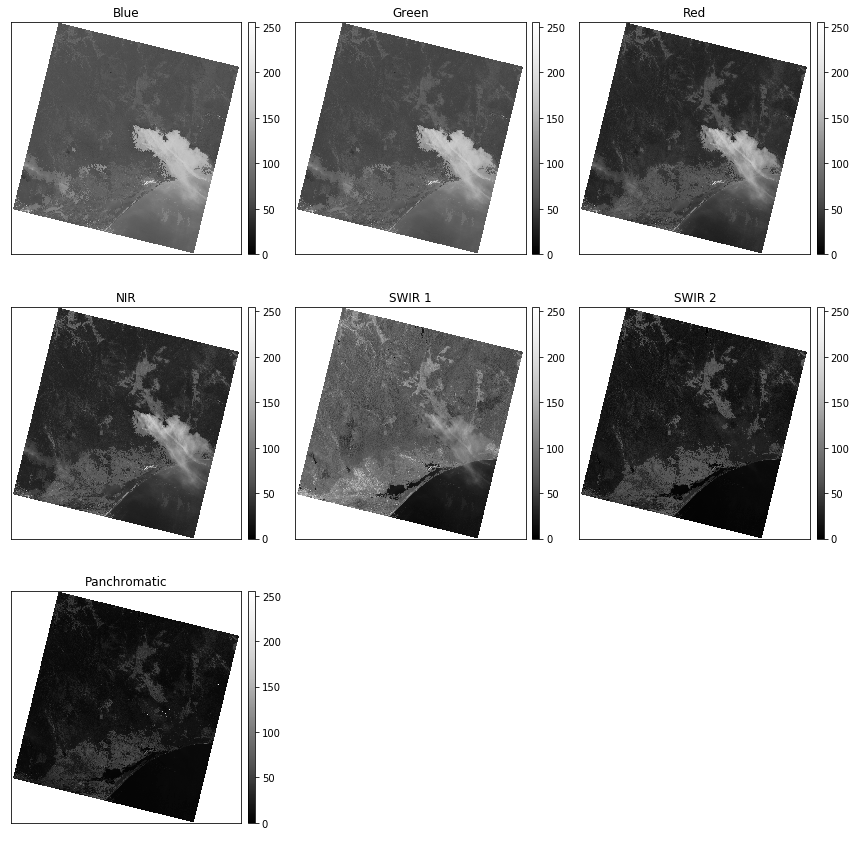

In [16]:
# mapping individual bands

titles = ["Blue", "Green", "Red", "NIR", "SWIR 1", "SWIR 2", "Panchromatic"]
# sphinx_gallery_thumbnail_number = 1
ep.plot_bands(array_stack, title=titles)
plt.show()

In [ ]:
ep.plot_rgb(array_stack,
            rgb=[2, 1, 0],
            title="RGB Composite Image\n Australia Landsat Data")
plt.show()

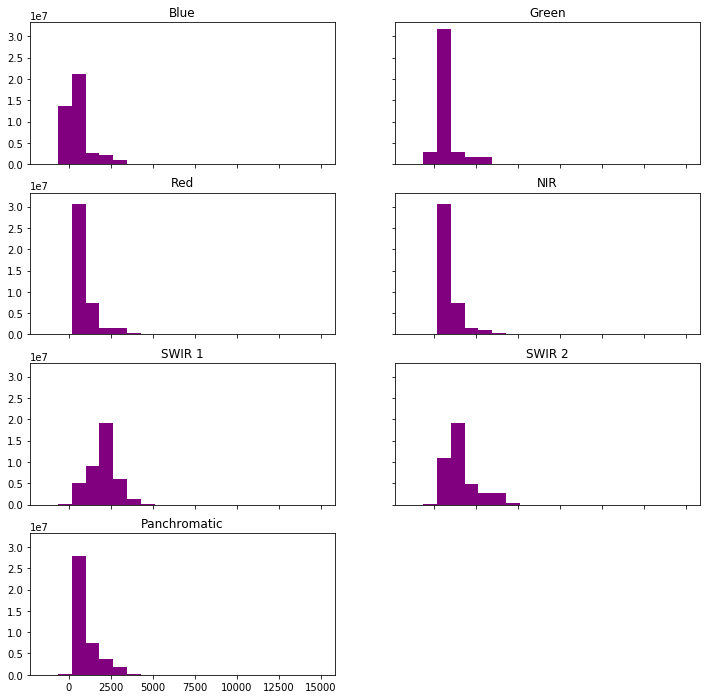

In [20]:
ep.hist(array_stack,
            title=titles)
plt.show()

In [13]:
# This simple function calculates the normalized differentiated vegetation index by taking NIR band and Red band as--
# --- the following calculation : (NIR-RED/NIR+RED) 
# NIR is the 3rd index position and 2nd is the red band 

ndvi = es.normalized_diff(array_stack[3], array_stack[2])

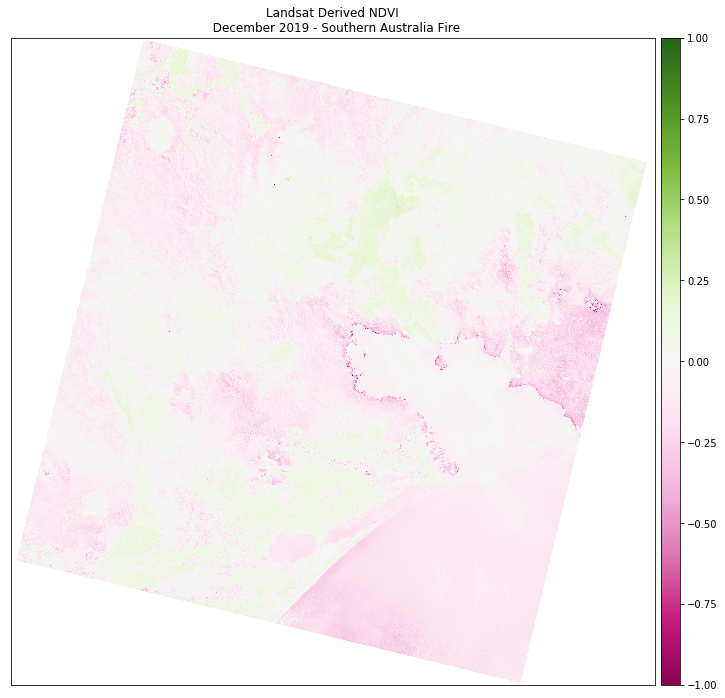

In [8]:

ep.plot_bands(ndvi, 
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Landsat Derived NDVI\n  December 2019 - Southern Australia Fire")
plt.show()

# values closer to negative 1 indicate unhealthy vegetation while values closer to 1 indicate healthy vegetation

(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c38e886388>)

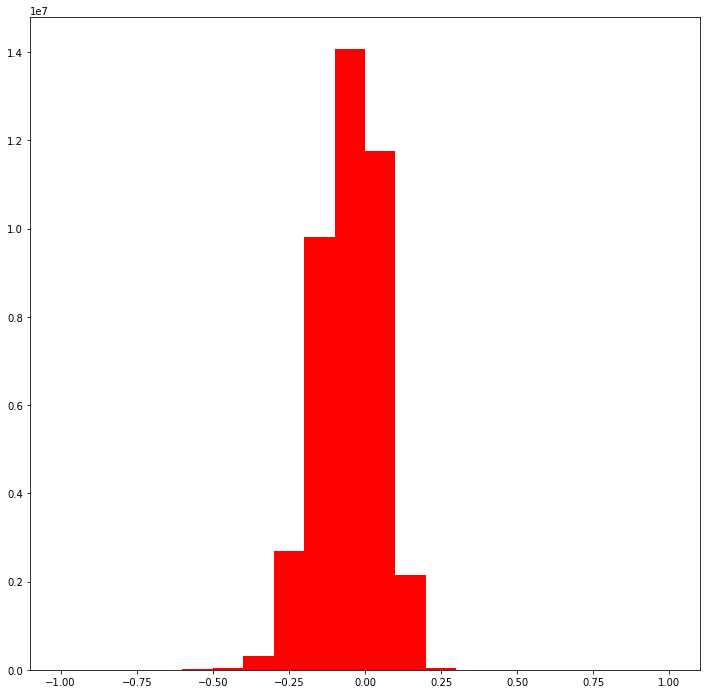

In [15]:
#histogram ndvi values of image
ep.hist(ndvi,colors = ['red'], figsize=(12, 12),hist_range= (-1,1))